# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier
### Vilas Chitrakaran

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# NOTE:
# German traffic signs dataset: http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
# Download link: https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip

# TODO: Fill this in based on where you saved the training and testing data
training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Training data shape = ", X_train.shape)
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print('Number of classes = {} in training set, {} in test set'.format(n_classes, len(np.unique(y_test))))

Training data shape =  (39209, 32, 32, 3)
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43 in training set, 43 in test set


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

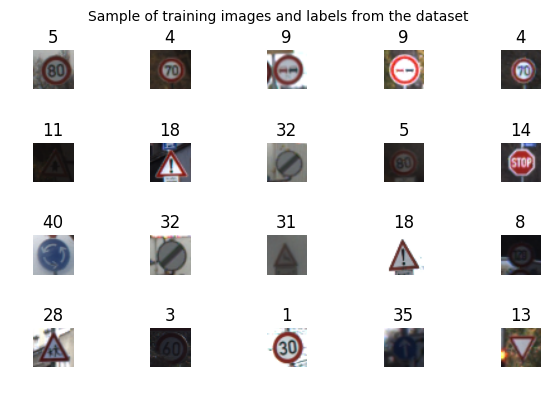

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# show 20 images from the dataset just to get an idea of how it looks
fig,ax = plt.subplots(4,5)
fig.suptitle('Sample of training images and labels from the dataset')
for i in range(20):
    #index = i
    index = random.randint(0, len(X_train)) # Training data is sorted by label! So remember to shuffle later
    image = X_train[index].squeeze()
    
    r = int(i/5)
    c = int(i%5)
    ax[r,c].imshow(image)
    ax[r,c].set_title(y_train[index])
    ax[r,c].axis('off')
    
# fine tune the plots
# hide ticks
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

__NOTE__: The following two code blocks were not part of original submission. This block implements work done by another student.

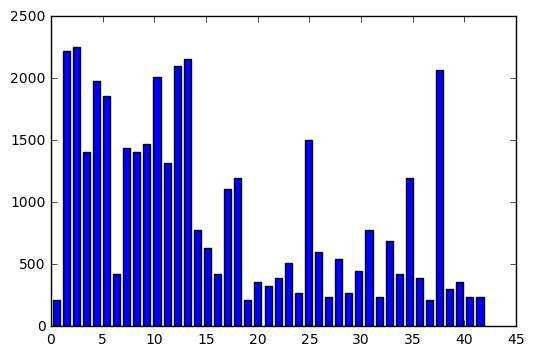

In [4]:
# Further experimentation (post submission)
# From https://github.com/jeremy-shannon/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [5]:
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))

[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
minimum samples for any label: 210


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

5


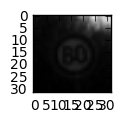

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# The reference paper obtained better results on greyscale. See paper for why this might be so. 
# So convert to greyscale.
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

# normalise images to range [-1,1] for numerical conditioning
X_train_normalised = (X_train_gray - 128)/128
X_test_normalised = (X_test_gray - 128)/128

# sanity check: how does the normalised greyscale image look?
index = random.randint(0, len(X_train_normalised))
image = X_train_normalised[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(y_train[index])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

* The images were converted to greyscale. As per the referenced academic paper, this gave better results. Although surprising, the authors in the paper hypothesize that this may be due to variable lighting conditions making colour information generally unreliable. The spatial structure of symbols in the images is more reliable than colour information.

* The pixel values were then normalised to range (-1, 1). This was one of the recommendations from the lesson on neural networks. Normalising the input, along with initialising the tunable parameters to random variables with zero mean and small standard deviation is expected to improve numerical conditioning of the optimisation problem.

__Note__: The following needs scikit-learn to be installed: 
```
pip install -U scikit-learn
```

__NOTE__: The following code block was not part of original submission. This block implements work done by another student.

In [ ]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Additional data generation methods
# For image transformations, see http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html

import cv2

def random_translate(image):
    dp = 3
    dx,dy = np.random.randint(-dp, dp, 2)
    rows,cols,_ = image.shape
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(image,M,(cols,rows))
    dst = dst[:,:,np.newaxis]
    return dst

def random_rotate(image):
    rows,cols,_ = image.shape
    max_deg = 3
    deg = np.random.randint(-max_deg, max_deg,1)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),deg,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    dst = dst[:,:,np.newaxis]
    return dst

def random_affine(image):
    rows,cols,_ = image.shape
    dp = 3
    p1x,p2x,p3x,p4x,p1y,p2y,p3y,p4y = np.random.randint(0,dp,8)
    p2x = cols - p2x
    p3y = rows - p3y
    p4x = cols - p4x
    p4y = rows - p4y
    pts1 = np.float32([[p1x,p1y],[p2x,p2y],[p3x,p3y],[p4x,p4y]])
    pts2 = np.float32([[0,0],[cols,0],[0,rows],[cols,rows]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(cols,rows))
    dst = dst[:,:,np.newaxis]
    return dst

# Further experimentation (post submission)
# From https://github.com/jeremy-shannon/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb
# Generate additional examples of data 
for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 500:
        for i in range(500 - n_samples):
            new_img = X_train_normalised[class_indices[0][i % n_samples]]
            new_img = random_translate(random_rotate(random_affine(new_img)))
            X_train_normalised = np.concatenate((X_train_normalised, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
                                       
# Show histogram after adding synthetic data
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()    

In [ ]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# shuffle the training data set because it comes ordered
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_train_normalised, y_train = shuffle(X_train_normalised, y_train)

# Allocate 20% of training set to validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalised, y_train, test_size=0.2, random_state=0)

n_train = len(X_train)
n_validation = len(X_validation)

print("Number of training examples after splitting =", n_train)
print("Number of validation examples after splitting =", n_validation)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

* The training data was shuffled, as the data provided was sorted according to labels.

* A subset of the training data was extracted to serve as validation set. As recommended by the instructor, 20% of training data was allocated.

* __NOTE__: I may decide to augment the training data with additional rotated/scaled/translated samples if the training results are not sufficiently good.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def conv2dWithRelu(x, W, b, strides=1, padding='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2, padding='SAME'):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding=padding)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
       
    # Layer 1: Convolution followed by ReLU. Input = 32x32x1. Output = 28x28x6.
    # Max Pooling. Input = 28x28x6. Output = 14x14x6.
    wc1 = tf.Variable(tf.truncated_normal([5,5,1,6], mean=mu, stddev=sigma))
    bc1 = tf.Variable(tf.truncated_normal([6], mean=mu, stddev=sigma))  
    conv1 = conv2dWithRelu(x, wc1, bc1, strides=1, padding='VALID')
    conv1 = maxpool2d(conv1, k=2, padding='SAME')

    # Layer 2: Convolution followed by ReLU. Input = 14x14x6, Output = 10x10x16.
    # Max Pooling. Input = 10x10x16. Output = 5x5x16.
    wc2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean=mu, stddev=sigma))
    bc2 = tf.Variable(tf.truncated_normal([16], mean=mu, stddev=sigma))  
    conv2 = conv2dWithRelu(conv1, wc2, bc2, strides=1, padding='VALID')
    conv2 = maxpool2d(conv2, k=2, padding='SAME')

    # Layer 3: Convolution followed by ReLU. Input = 5x5x16, Output = 1x1x400.
    wc3 = tf.Variable(tf.truncated_normal([5,5,16,400], mean=mu, stddev=sigma))
    bc3 = tf.Variable(tf.truncated_normal([400], mean=mu, stddev=sigma))  
    conv3 = conv2dWithRelu(conv2, wc3, bc3, strides=1, padding='VALID')

    # Flatten and concatenate. Input = conv2 (5x5x16) and conv3 (1x1x400). Output = 800.
    # Dropout regularisation
    fc1 = flatten(conv2)
    fc2 = flatten(conv3)
    fc = tf.concat_v2([fc1, fc2], 1)
    fc = tf.nn.dropout(fc, keep_prob)
    
    # Layer 4: Fully Connected. Input = 800. Output = 43.   
    wd1 = tf.Variable(tf.truncated_normal([800, 43], mean=mu, stddev=sigma))
    bd1 = tf.Variable(tf.truncated_normal([43], mean=mu, stddev=sigma))
    logits = tf.add(tf.matmul(fc, wd1), bd1)
    return logits

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I started with the architecture we built for Lenet Lab as a starting point. I then modified this to match the architecture proposed in Yann LeCun's reference paper, but with ReLU activation after each convolution layer and dropout regularisation before the final fully connected layer. The final architecture has the following structure:

In [ ]:
# Embed the architecture diagram
from scipy import ndimage
my_architecture = ndimage.imread('./my_model.png')
plt.figure(figsize=(15,5))
plt.imshow(my_architecture)
plt.axis('off')
plt.subplots_adjust(top=1, bottom=0)

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 20
BATCH_SIZE = 150
LEARNING_RATE = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
# Model evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
# Train the model

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './p2_model')
    print("Model saved")

### Notes 

* Starting point - my Lenet tutorial code with dropout regularizer 
    * EPOCHS = 20, BATCH_SIZE = 128, LEARNING_RATE = 0.001
    * validation_accuracy = 0.946 

* Modified final architecture 
    * EPOCHS = 20, BATCH_SIZE = 150, LEARNING_RATE = 0.001
    * validation_accuracy > 0.987 

In [ ]:
# Number of trainable parameters from the graph
total_parameters = 0
for variable in tf.trainable_variables():
    shape = variable.get_shape()
    variable_parameters = 1
    for dim in shape:
        variable_parameters *= dim.value
    total_parameters += variable_parameters
print("Total trainable parameters = {}".format(total_parameters))
print()

__Don't proceed further until validation accuracy is satisfactory__

In [ ]:
# Model evaluation on test data

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_normalised, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the Adam optimiser here, which just happened to be the one that we used for the Lenet Lab. I experimented with a variety of ranges for the hyper-parameters and eventually settled on the following values that consistently gave me better than 0.987 validation accuracy:

* epochs = 20
* batch size = 150
* learning rate = 0.001
* keep probability of inputs to the final fully connected layer = 0.5 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My approach was entirely based on tips from previous lessons covering neural nets and deep learning in this course. I started with a modified Lenet-5 implementation that I developed for a previous lab. This actually worked, but gave a validation accuracy of about 0.94. I then modified the architecture to mimic the one presented in the reference paper to get a validation accuracy close to human performance as mentioned in the paper. I left most of the intermediate layers and their dimensions as is except the final fully connected layer. Dropouts seemed like a very good reqularisation technique to robustify this layer to overfitting; however I ensured that this layer would have sufficient input features (by an order of magnitude relative to input) to avoid underfitting as well. After this point, most of my time was spent on tuning the hyper-parameters. Specifically, number of epochs > 20 didn't seem to provide an advantage in terms of validation accuracy. Batch size was also set by trial and error; however values between 50 - 150 didn't seem to change validation accuracy by much. 

I did not consider generating additional data by affine transforming the existing training set because the architecture seemed to work well enough and because I was running out of time. I would have liked to try methods such as learning rate decay and using color information in the input in some way, but gave up due to time.

On suitability of the architecture: My only background in the subject is what I have learned in this course so far. The Lenet architecture is suitable as a starting point because the traffic sign classifier problem is very similar to the character recognition problem in that both classify a set of symbols. I assume that the final 1x1 convolution and fully connected layers sufficiently model the complexity of the features in the images and dropouts add robustness.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from scipy import ndimage
import csv

# load the label descriptions from csv file
import csv
with open('./signnames.csv') as f:
    label_desc=[tuple(line) for line in csv.reader(f)]

# load all images
my_images = []
my_labels = []
my_images.append(ndimage.imread('./report_data/01_speed_20.png'))
my_labels.append(0)
my_images.append(ndimage.imread('./report_data/02_speed_50.png'))
my_labels.append(2)
my_images.append(ndimage.imread('./report_data/03_speed_30.png'))
my_labels.append(1)
my_images.append(ndimage.imread('./report_data/04_speed_50.png'))
my_labels.append(2)
my_images.append(ndimage.imread('./report_data/05_speed_30.png'))
my_labels.append(1)
my_images.append(ndimage.imread('./report_data/06_roundabout.png'))
my_labels.append(40)
my_images.append(ndimage.imread('./report_data/07_no_entry.png'))
my_labels.append(17)
my_images.append(ndimage.imread('./report_data/08_stop.png'))
my_labels.append(14)
my_images.append(ndimage.imread('./report_data/09_children.png'))
my_labels.append(28)
my_images.append(ndimage.imread('./report_data/10_speed_50.png'))
my_labels.append(2)
my_images.append(ndimage.imread('./report_data/11_speed_50.png'))
my_labels.append(2)
my_images.append(ndimage.imread('./report_data/12_speed_50.png'))
my_labels.append(2)
my_images.append(ndimage.imread('./report_data/13_yield.png'))
my_labels.append(13)
my_images.append(ndimage.imread('./report_data/14_intersect_row.png'))
my_labels.append(11)
my_images.append(ndimage.imread('./report_data/15_caution.png'))
my_labels.append(18)
my_images.append(ndimage.imread('./report_data/16_roadworks.png'))
my_labels.append(25)
my_images.append(ndimage.imread('./report_data/17_roadworks.png'))
my_labels.append(25)

# convert them into arrays
my_images = np.asarray(my_images)
my_labels = np.asarray(my_labels)

# show images from the dataset
nimages = len(my_images)
fig,ax = plt.subplots(nimages, 2, figsize=(10,10))
fig.suptitle('Sample of my test images and labels')
for i in range(0, nimages):
    image = my_images[i].squeeze()
    ax[i,0].imshow(image)
    ax[i,1].text(0,0,'label={} ({})'.format(my_labels[i], label_desc[my_labels[i]+1][1]))
    ax[i,0].axis('off')
    ax[i,1].axis('off')
plt.show()

print("My test dataset shape = ", my_images.shape)
print("My test dataset unique labels = ", len(np.unique(my_labels)))


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Most of the images above were captured on my mobile phone mounted to my car's dashboard on my commute to work over a couple of days. There are a few difficult cases as evident from the following code that processes all images. I have included all images I could capture in my report, not just the five. However, here is a brief description of some of the challenges with my dataset: 

* The network was trained on German traffic signs, while my test images are from the UK, where I live. Some of the signs are subtly different. For instance, the 'roadworks' sign

In [ ]:
# Embed the architecture diagram
british_sign = ndimage.imread('./report_data/17_roadworks_highres.png')
german_sign = ndimage.imread('./report_data/17_roadworks_german.png')

fig,ax = plt.subplots(1, 2, figsize=(5,15))
ax.ravel()
ax[0].imshow(british_sign)
ax[0].set_title('British Sign')
ax[1].imshow(german_sign)
ax[1].set_title('German Sign')
plt.subplots_adjust(hspace=.006)
plt.show()


Perhaps they are different because we drive on different sides of the road. Similarly, the road sign for 'roundabouts' are different because we go around them in different directions.

* A couple of images in my dataset were off the internet, and shows the traffic sign at an angle that the network is perhaps not trained to handle. With a forward facing camera, it is unlikely that a self-driving car would capture road signs from such a distorted perspective anyway

In [ ]:
distorted_sign = ndimage.imread('./report_data/02_speed_50.png')
plt.figure(figsize=(.6,.6))
plt.imshow(distorted_sign)
plt.title('Distorted Sign')
plt.axis('off')
plt.subplots_adjust(top=1, bottom=0)
plt.show()

* 32x32 pixel images are potentially too small to capture all the detail within all the road signs. I found that even with a wide angle video camera (albeit at 1080p), the area of the image enclosing the signs are anywhere between 100x100 to 200x200 pixels. At this resolution, the signs are at least visually more readable and recognisable. Higher resolution may help the network classify better, and the higher computational cost may be acceptable.

* Camera placement is probably quite important. For instance, my camera was mounted near the driver, as we mostly tend to do. However the road signs typically appear on the side of the road that is opposite from the driver. There must be an optimal position and orientation of the camera that provides the best chances of capturing the signs without too much perspective distortion.

* Image stabilisation may be important as well. I had to throw away few images because the road signs in them appeared too motion-blurred to be useful. Realistically, we could potentially have a processing pipeline that uses temporal information as well (as we did in P1) in order to compensate for some of this as most signs are visible for a few frames of video as we pass by them even at high speeds.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Preprocess images: convert to greyscale and normalise.
my_images_gray = np.sum(my_images/3, axis=3, keepdims=True)
my_images_normalised = (my_images_gray - 128)/128

# Model evaluation on my data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(my_images_normalised, my_labels)
    print("Test Accuracy on my images = {:.3f}".format(test_accuracy))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

No. The accuracy is significantly lower on test images that I captured. The answer to my previous question attempts to hypothesize a few reasons why this might be.


In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

evaluate_softmax = tf.nn.softmax(logits)
evaluate_topk = tf.nn.top_k(evaluate_softmax, k=3)

# Model evaluation on my data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax = sess.run(evaluate_softmax, feed_dict={x: my_images_normalised, keep_prob: 1.0})
    my_topk = sess.run(evaluate_topk, feed_dict={x: my_images_normalised, keep_prob: 1.0})
    
# Show predictions visually - pass if the most confident prediction is correct
nimages = len(my_images)
fig,ax = plt.subplots(nimages, 4, figsize=(5,15))
for i in range(0, nimages):
    image = my_images[i].squeeze()
    txt = 'PASS' if (my_labels[i]== my_topk[1][i][0]) else 'FAIL'
    ax[i,0].text(0,0,i+1)
    ax[i,1].imshow(image)
    ax[i,2].text(0,0, txt)
    ax[i,3].text(0,0,'correct label: {} [{}]\n\
    1st prediction: {:06.2f}% for {} [{}] \n\
    2nd prediction: {:06.2f}% for {} [{}] \n\
    3rd prediction: {:06.2f}% for {} [{}] '
                 .format(my_labels[i], label_desc[my_labels[i]+1][1],
                         my_topk[0][i][0]*100, my_topk[1][i][0], label_desc[my_topk[1][i][0]+1][1],
                         my_topk[0][i][1]*100, my_topk[1][i][1], label_desc[my_topk[1][i][1]+1][1],
                         my_topk[0][i][2]*100, my_topk[1][i][2], label_desc[my_topk[1][i][2]+1][1]
                        ),fontsize=8)
    ax[i,0].axis('off')
    ax[i,1].axis('off')
    ax[i,2].axis('off')
    ax[i,3].axis('off')
plt.subplots_adjust(hspace=.006)
plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

**Answer:**

The following code plots the softmax probabilities computed for every image in my test data set. Discussion follows after the plots.

In [ ]:
fig,ax = plt.subplots(nimages, 4, figsize=(10,25))
for i in range(0, nimages):
    image = my_images[i].squeeze()
    txt = 'PASS' if (my_labels[i]== my_topk[1][i][0]) else 'FAIL'
    txt += '\nCorrect label: {}'.format(my_labels[i])
    ax[i,0].text(0,0,i+1)
    ax[i,1].imshow(image)
    ax[i,2].text(0,0,txt)
    ax[i,3].bar(np.arange(n_classes), my_softmax[i]) 
    ax[i,3].set_ylabel('p')
    ax[i,0].axis('off')
    ax[i,1].axis('off')
    ax[i,2].axis('off')
#plt.subplots_adjust(hspace=.1)
#plt.tight_layout()
#plt.show()
    

__NOTE__: The following were for a specific run that was submitted for evaluation. It may not apply if you retrain the network

* Firstly, I noticed that for different fresh runs of the network, the validation accuracy on the training set and the test accuracy were consistent (~0.98 and ~0.94, respectively). However, on my own dataset the results varied - especially on those images that I expected the network to succeed on (Such as images 1, 3-5, and 10-12). This perhaps suggests a network architecture that is not optimised.

* We shouldn't perhaps trust those instances where the network successfully classified an image but did so with multiple close hypothesis (example: image 1, 2).

* Noise in the image most likely explains the failure in image 4. Potentially fixed with higher resolution image datasets as explained earlier.

* The final two images are the same, except that the last one was rotated to align vertically in the hope that the network will have a better change at classifying it correctly. This was before I realised that this particular road sign is different in the training dataset, as described earlier.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.